In [20]:
import pandas as pd

# Specify the path to your CSV file
csv_file_path = 'hand_history.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Now, 'df' contains the data from the CSV file in a DataFrame
# You can perform various operations on 'df'
print(len(df))
print(df.columns)

10000
Index(['POSITION', 'PLR_START_PREFLOP', 'PLR_START_FLOP', 'PLR_START_TURN',
       'PLR_START_RIVER', 'HND_RNK_PREFLOP', 'HND_RNK_FLOP', 'HND_RNK_TURN',
       'HND_RNK_RIVER', 'PLR_BEFORE_HERO_PREFLOP', 'PLR_BEFORE_HERO_FLOP',
       'PLR_BEFORE_HERO_TURN', 'PLR_BEFORE_HERO_RIVER', 'POT_START_FLOP',
       'POT_START_TURN', 'POT_START_RIVER', 'FINAL_POT', 'HERO_EQ_PREFLOP',
       'HERO_EQ_FLOP', 'HERO_EQ_TURN', 'HERO_EQ_RIVER', 'CALL_AMT_PREFLOP',
       'CALL_AMT_FLOP', 'CALL_AMT_TURN', 'CALL_AMT_RIVER', 'ACT_PREFLOP',
       'ACT_FLOP', 'ACT_TURN', 'ACT_RIVER', 'ACT_AMT_PREFLOP', 'ACT_AMT_FLOP',
       'ACT_AMT_TURN', 'ACT_AMT_RIVER', 'IN_SHOWDOWN', 'HERO_HAND',
       'BEST_NON_HERO_HAND', 'INIT_STACK', 'FINAL_STACK'],
      dtype='object')


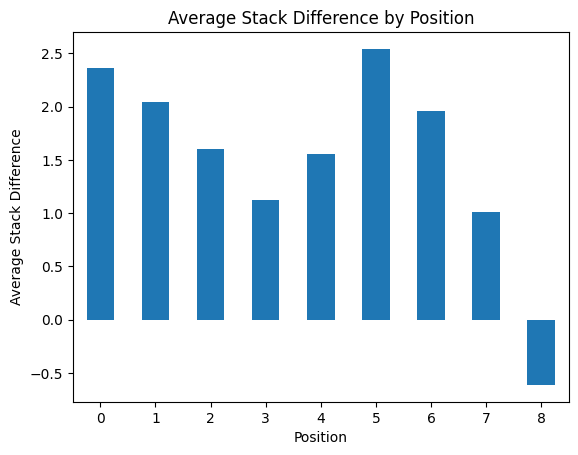

In [21]:
# Avg win/loss by position -- 0 is SB
import matplotlib.pyplot as plt
# Calculate the difference
df['STACK_DIFF'] = df['FINAL_STACK'] - df['INIT_STACK']

# Group by 'POSITION' and calculate mean difference
mean_diff = df.groupby('POSITION')['STACK_DIFF'].mean()

# Plotting
mean_diff.plot(kind='bar')
plt.xlabel('Position')
plt.ylabel('Average Stack Difference')
plt.title('Average Stack Difference by Position')
plt.xticks(rotation=0)  # Rotate x-axis labels to show them horizontally
plt.show()

In [22]:
# How many showdowns did we win lose
df['STACK_DIFF'] = df['FINAL_STACK'] - df['INIT_STACK']
df['WON'] = df['STACK_DIFF'] > 0
in_showdown = df[df['IN_SHOWDOWN'] == True]

perc = len(in_showdown) / len(df)
print(f"In showdown: {100*perc:.2f}%")

won_showdown = in_showdown[in_showdown['WON'] == True]
perc_won = len(won_showdown) / len(in_showdown)
print(f"Won showdown: {100*perc_won:.2f}%")

In showdown: 18.78%
Won showdown: 33.12%


In [34]:
# Find some example hands in position 8

lost_as_button = df[ (df['STACK_DIFF'] < -15) & (df['POSITION'] == 8) ]

print(f"Lost as button {len(lost_as_button)}")

# Get the original DataFrame indices for the first 10 rows of the filtered DataFrame
first_10_indices = lost_as_button.head(10).index

print(f"Lost as button {len(lost_as_button)}")
print("Original indices of the first 10 rows:")
print(first_10_indices)

row = df.iloc[8]

print(row['STACK_DIFF'])

Lost as button 125
Lost as button 125
Original indices of the first 10 rows:
Index([430, 542, 552, 637, 676, 718, 777, 797, 878, 1159], dtype='int64')
-3.0
